<a href="https://colab.research.google.com/github/SherlockJagadeesh/Problems/blob/main/Sporty_Guru_Internship_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Importing dataset

In [ ]:
dataset = tf.keras.datasets.cifar10.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test) = dataset
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

Data Exploration & Data Wrangling

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
print(y_train[0])
print(y_test[0])

[6]
[3]


In [ ]:
y_test = y_test.reshape(-1)
y_train = y_train.reshape(-1)

In [ ]:
print(y_train[0])
print(y_test[0])

6
3


In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_image(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index].squeeze()])

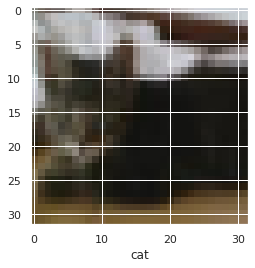

In [ ]:
plot_image(x_train,y_train,9)

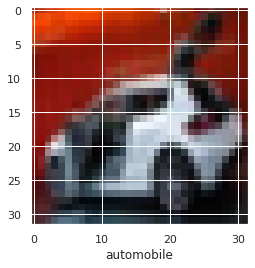

In [ ]:
plot_image(x_test,y_test,6)

Defining the Parameters

In [ ]:
train_loader = (x_train,y_train)
test_loader = (x_test,y_test)
LEARNING_RATE = 0.001
NUM_EPOCHS = 50

Building the Models

In [ ]:
class NetA():
    
    def train(self,train_set,test_set,num_epochs,lr,compute_accs):
        self = tf.keras.Sequential()
        self.add(tf.keras.layers.Flatten(input_shape = (32,32,3)))
        self.add(tf.keras.layers.Dense(10,activation = 'linear'))
        optimizer_fn = tf.keras.optimizers.Adam(learning_rate = lr)
        self.compile(optimizer = optimizer_fn,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        History = self.fit(train_set[0],train_set[1],validation_data = test_set,verbose = 2,epochs = num_epochs)
        
        if compute_accs == True:
            train_history = History.history['accuracy']
            test_history = History.history['val_accuracy']
            return (History.epoch,train_history,test_history)
        else:
            return (History.epoch,0,0)
                
    pass

In [ ]:
class NetB():
    
    def train(self,train_set,test_set,num_epochs,lr,compute_accs):
        self = tf.keras.Sequential()
        self.add(tf.keras.layers.Flatten(input_shape = (32,32,3)))
        self.add(tf.keras.layers.Dense(300,activation = 'relu'))
        self.add(tf.keras.layers.Dense(10,activation = 'softmax'))
        optimizer_fn = tf.keras.optimizers.Adam(learning_rate = lr)
        self.compile(optimizer = optimizer_fn,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        History = self.fit(train_set[0],train_set[1],validation_data = test_set,verbose = 2,epochs = num_epochs)
        
        if compute_accs == True:
            train_history = History.history['accuracy']
            test_history = History.history['val_accuracy']
            return (History.epoch,train_history,test_history)
        else:
            return (History.epoch,0,0)
                
    pass

In [ ]:
class NetC():
    
    def train(self,train_set,test_set,num_epochs,lr,compute_accs):
        self = tf.keras.Sequential()
        self.add(tf.keras.layers.Conv2D(25,5,activation='relu',input_shape = (32,32,3)))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        self.add(tf.keras.layers.Flatten())
        self.add(tf.keras.layers.Dense(10,activation = 'softmax'))
        optimizer_fn = tf.keras.optimizers.Adam(learning_rate = lr)
        self.compile(optimizer = optimizer_fn,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        History = self.fit(train_set[0],train_set[1],validation_data = test_set,verbose = 2,epochs = num_epochs)

        if compute_accs == True:
            train_history = History.history['accuracy']
            test_history = History.history['val_accuracy']
            return (History.epoch,train_history,test_history)
        else:
            return (History.epoch,0,0)
                
    pass

I have Applied Early Stopping in order to stop from overfitting the model

In [ ]:
class NetD():
    
    def train(self,train_set,test_set,num_epochs,lr,compute_accs):
        self = tf.keras.Sequential()
        self.add(tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=[32,32,3]))
        self.add(tf.keras.layers.Conv2D(32,3,activation='relu'))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
        self.add(tf.keras.layers.Conv2D(64,3,activation='relu'))
        self.add(tf.keras.layers.Conv2D(64,3,activation='relu'))
        self.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
        self.add(tf.keras.layers.Flatten())
        self.add(tf.keras.layers.Dense(units = 128,activation='relu'))
        self.add(tf.keras.layers.Dense(10, activation = 'softmax'))
        optimizer_fn = tf.keras.optimizers.Adam(learning_rate = lr)
        self.compile(optimizer = optimizer_fn,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 mode='auto',
                                                 min_delta=0,
                                                 patience=3,
                                                 verbose=0,
                                                 restore_best_weights=True)
        History = self.fit(train_set[0],train_set[1],validation_data = test_set,
                           callbacks=[Early_Stopping],verbose = 2,epochs = num_epochs)

        if compute_accs == True:
            train_history = History.history['accuracy']
            test_history = History.history['val_accuracy']
            return (History.epoch,train_history,test_history)
        else:
            return (History.epoch,0,0)
                
    pass

Plot Function

In [ ]:
def plot_history(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(7,7))
        plt.title(histories[i]['name'])
        plt.xlabel('Epochs')
        plt.ylabel('Accuracies')
        plt.plot(histories[i]['epochs'],histories[i]['train_accs'],color='red',label='Training')
        plt.plot(histories[i]['epochs'],histories[i]['test_accs'],color='blue',label='Testing')
        plt.legend()
        plt.show()

Results

==== Training NetD ====
Epoch 1/50
1563/1563 - 171s - loss: 1.6782 - accuracy: 0.4353 - val_loss: 1.2923 - val_accuracy: 0.5385 - 171s/epoch - 109ms/step
Epoch 2/50
1563/1563 - 174s - loss: 1.1578 - accuracy: 0.5916 - val_loss: 1.1480 - val_accuracy: 0.6021 - 174s/epoch - 111ms/step
Epoch 3/50
1563/1563 - 174s - loss: 0.9829 - accuracy: 0.6603 - val_loss: 0.9656 - val_accuracy: 0.6657 - 174s/epoch - 111ms/step
Epoch 4/50
1563/1563 - 174s - loss: 0.8771 - accuracy: 0.6964 - val_loss: 1.0097 - val_accuracy: 0.6564 - 174s/epoch - 111ms/step
Epoch 5/50
1563/1563 - 174s - loss: 0.7920 - accuracy: 0.7247 - val_loss: 0.9669 - val_accuracy: 0.6740 - 174s/epoch - 112ms/step
Epoch 6/50
1563/1563 - 173s - loss: 0.7234 - accuracy: 0.7477 - val_loss: 0.8861 - val_accuracy: 0.6991 - 173s/epoch - 111ms/step
Epoch 7/50
1563/1563 - 174s - loss: 0.6580 - accuracy: 0.7699 - val_loss: 0.9451 - val_accuracy: 0.6848 - 174s/epoch - 112ms/step
Epoch 8/50
1563/1563 - 176s - loss: 0.6072 - accuracy: 0.7851 - va

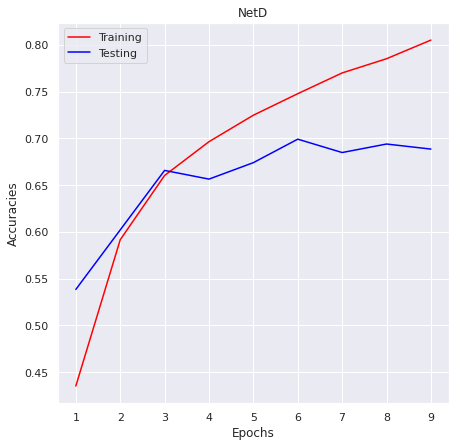

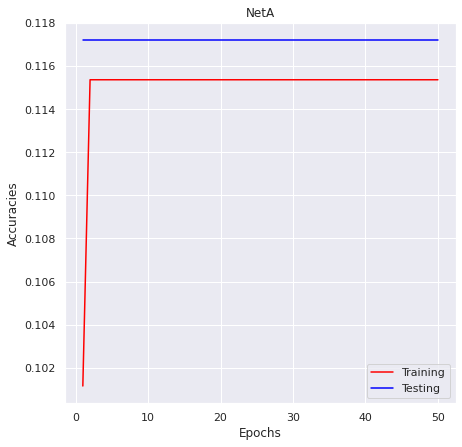

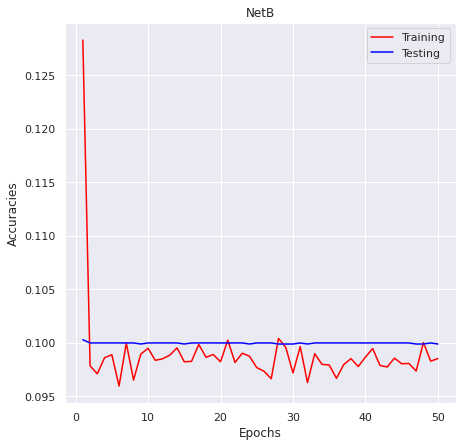

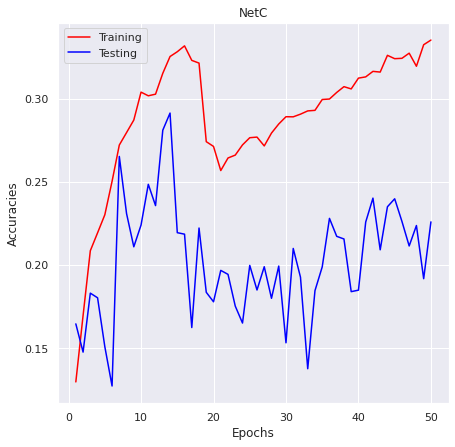

In [ ]:
nets = [NetD(), NetA(), NetB(),NetC()]
histories = []

for net in nets:
    net_name = type(net).__name__
    print(f'==== Training {net_name} ====')
    epochs, train_history, test_history = net.train(train_loader,test_loader,NUM_EPOCHS,LEARNING_RATE,compute_accs=True)
    histories.append({
        'epochs':np.asarray(epochs)+1,
        'name': net_name,
        'net': net,
        'train_accs': train_history,
        'test_accs': test_history
        })

plot_history(histories)